## Combining all the results

In [22]:
import pandas as pd

# Read each CSV file into separate DataFrames
df_1 = pd.read_csv("./all_results/results_1.csv")
df_2 = pd.read_csv("./all_results/results_2.csv")
df_3 = pd.read_csv("./all_results/results_3.csv")

# Concatenate the DataFrames vertically
df = pd.concat([df_1, df_2, df_3], ignore_index=True)

# Display the merged DataFrame
print(df)


   MODEL_NAME  Rouge  Bleu  Sentiment  Fact checking  Bert Score   RoberTa
0  MODEL_NAME   0.00  0.00        0.9            0.4    0.000000 -0.091454
1  MODEL_NAME   0.00  0.00        0.9            0.4    0.000000 -0.091454
2  MODEL_NAME   0.14  0.14        0.9            0.4    0.852724  0.583766


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read each CSV file into separate DataFrames
df_1 = pd.read_csv("./all_results/results_1.csv")
df_2 = pd.read_csv("./all_results/results_2.csv")
df_3 = pd.read_csv("./all_results/results_3.csv")

# Concatenate the DataFrames vertically
merged_df = pd.concat([df_1, df_2, df_3], ignore_index=True)

# Set 'Model Name' column as the index
merged_df.set_index('MODEL_NAME', inplace=True)
merged_df



,Rouge,Bleu,Sentiment,Fact checking,Bert Score,RoberTa
MODEL_NAME,,,,,,
MODEL_NAME,0.00,0.00,0.9,0.4,0.000000,-0.091454
MODEL_NAME,0.00,0.00,0.9,0.4,0.000000,-0.091454
MODEL_NAME,0.14,0.14,0.9,0.4,0.852724,0.583766


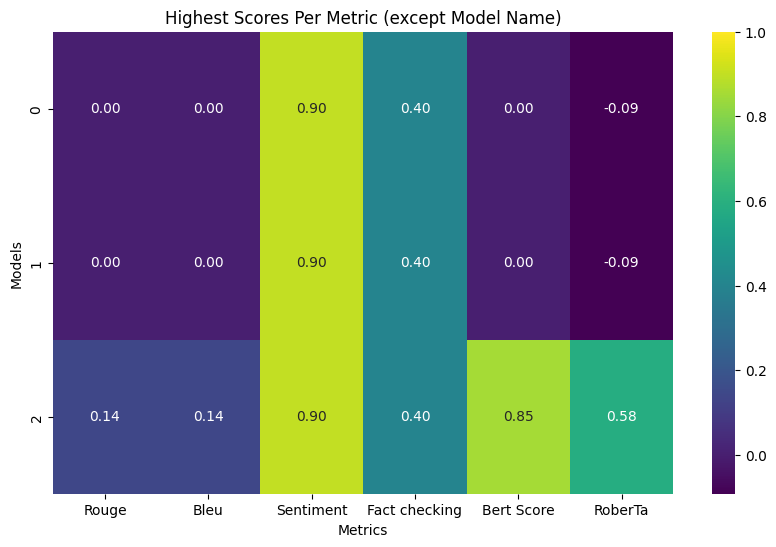

Model Name: 2, Average Best Rouge: 0.14
Model Name: 2, Average Best Bleu: 0.14
Model Name: 0, Average Best Sentiment: 0.9
Model Name: 0, Average Best Fact checking: 0.4
Model Name: 2, Average Best Bert Score: 0.8527240753173828
Model Name: 2, Average Best RoberTa: 0.5837660133838654


In [34]:
# Remove 'Model Name' row for heatmap
heatmap_data = merged_df.copy()
heatmap_data.reset_index(drop=True, inplace=True)  # Reset index to remove 'Model Name' from columns

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f", vmax=1.0)
plt.title('Highest Scores Per Metric (except Model Name)')
plt.xlabel('Metrics')
plt.ylabel('Models')
plt.show()

# Calculate average best scores and print the model name
for col in heatmap_data.columns:
    max_score = heatmap_data[col].max()
    model_name = heatmap_data[heatmap_data[col] == max_score].index[0]
    print(f"Model Name: {model_name}, Average Best {col}: {max_score}")